In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
import ipywidgets as widgets


import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [11]:
artifacts_dir = "/home/sk/sandmark/notebooks/nightly/sandmark-nightly/"
selected_files = []
selected_baseline = ""

In [12]:
bench_files = []

artifacts_path = artifacts_dir.split("/sandmark-nightly/sequential")[0]
# print(artifacts_path)

for root, dirs, files in os.walk(artifacts_dir):
#     print(dirs)
    for file in files:
#         print(file)
        if file.endswith(".orun.summary.bench"):
            # print(root)
            f = root.split("/sequential/")
#             print(f)
            bench_files.append((os.path.join(root, file)))

# print(bench_files)

In [13]:
len(bench_files)
print(bench_files)

['/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210518_111318/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210523_220001/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210520_200001/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210520_200001/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_040001/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/san

In [14]:
benches = dict()
for x in bench_files:
    l = x.split("/sequential/")[1]
#     print(l)
    d = l.split("/")
#     print(d)
#     commit     = d[0]
    timestamp  = d[0]
    variant    = d[1]
    value      = timestamp + " " + variant
    if timestamp in benches.keys():
        benches[timestamp].append(value)
    else:
        benches[timestamp]=[value]

In [15]:
benches

{'20210522_160001': ['20210522_160001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210522_160001 4.12.0+stock_1.orun.summary.bench'],
 '20210518_111318': ['20210518_111318 4.12.0+domains+effects_1.orun.summary.bench',
  '20210518_111318 4.12.0+stock_1.orun.summary.bench'],
 '20210523_220001': ['20210523_220001 4.12.0+domains+effects_1.orun.summary.bench'],
 '20210520_200001': ['20210520_200001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210520_200001 4.12.0+stock_1.orun.summary.bench'],
 '20210522_040001': ['20210522_040001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210522_040001 4.12.0+stock_1.orun.summary.bench'],
 '20210519_060001': ['20210519_060001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210519_060001 4.12.0+stock_1.orun.summary.bench'],
 '20210521_120001': ['20210521_120001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210521_120001 4.12.0+stock_1.orun.summary.bench'],
 '20210518_152857': ['20210518_152857 4.12.0+domains+effects_1.orun.summary

In [16]:
def f(x): return x

def disp(benches):    
    def select_timestamp(timestamp):
        variantW.options = benches[timestamp]

    def select_variant(variant):
        return None
    
    timestampW = widgets.Dropdown(options=benches.keys(), description='Timestamp', disabled=False)
    timestampS = timestampW.value
#     print(timestampS)
    timestampD = widgets.interactive(select_timestamp, timestamp=timestampW)

    variantW = widgets.Dropdown(options=benches[timestampS], description='Variant', disabled=False)
    varinatS = variantW.value
    variantD = widgets.interactive(select_variant, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [timestampD, variantD]
    box = Box(children=items, layout=box_layout)
#     print(box)
    display(box)
    return (timestampD, variantD)

def get_filename(timestamp, variant):
#     print(artifacts_path)
    timestamp = timestamp.children[0].value
    variant = variant.children[0].value
    variant = variant.split(" ")
#     print(artifacts_path)
    filename = os.path.join(artifacts_path, "sequential", timestamp, variant[1])
    print(filename)
    return filename

In [17]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [18]:
print(comparisons.result)

2


In [19]:
matrix = [[0 for x in range(4)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210522_160001', '20210518_11…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210522_160001', '20210518_11…

In [20]:
for i in range(comparisons.result):
    matrix[i][3] = get_filename(matrix[i][0], matrix[i][1])

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+stock_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+domains+effects_1.orun.summary.bench


In [21]:
for i in range (comparisons.result):
    print(matrix[i][3])
    selected_files.append(matrix[i][3])

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+stock_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+domains+effects_1.orun.summary.bench


In [36]:
data_frames = []

for file in selected_files:
    print(file)
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df["variant"] = os.path.basename(file).replace("_1.orun.summary.bench","")
        df["date_variant"] = file.split("/")[-2] + "_" + df["variant"]
#         print(df["date_variant"])
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+stock_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210522_160001/4.12.0+domains+effects_1.orun.summary.bench


<ipython-input-36-8083fead64ba>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant,date_variant,gc.mean_space_overhead
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.184630,4.156361,0.028002,37876,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,8217,2,4231434,NaN,4231434,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,3.492858
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.008688,4.000419,0.008000,29688,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,8218,4,5790208,4.0,5790208,0.0,1,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
24,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.429050,2.193164,0.235542,425940,2865246.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,653,17,51724355,NaN,52392003,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,5.562723
24,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.180289,2.031984,0.147998,352276,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,698,13,49342464,37.0,49342464,0.0,0,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
13,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.192928,17.993346,0.198106,318820,2865246.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,7824,27,38252217,NaN,38252217,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,25.387992
13,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.451923,17.281789,0.169709,282716,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,7882,21,37309440,35.0,37309440,0.0,0,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.305306,5.280978,0.023986,21280,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,4689,9,2264576,15.0,2264576,0.0,0,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.642527,5.630220,0.011996,22352,164078.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4695,10,2023316,NaN,2088855,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,24.370582
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.815547,11.755204,0.059995,146976,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,3565,69,15786238,NaN,18084094,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,38.706226
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.657145,12.580786,0.076004,154900,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,3527,63,18974208,33.0,18974208,0.0,1,4.12.0+stock,20210522_160001_4.12.0+stock,NaN


In [37]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant,date_variant,gc.mean_space_overhead
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.184630,4.156361,0.028002,37876,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,8217,2,4231434,NaN,4231434,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,3.492858
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.008688,4.000419,0.008000,29688,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,8218,4,5790208,4.0,5790208,0.0,1,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.305306,5.280978,0.023986,21280,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,4689,9,2264576,15.0,2264576,0.0,0,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.642527,5.630220,0.011996,22352,164078.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4695,10,2023316,NaN,2088855,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,24.370582
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.815547,11.755204,0.059995,146976,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,3565,69,15786238,NaN,18084094,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,38.706226
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.657145,12.580786,0.076004,154900,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,3527,63,18974208,33.0,18974208,0.0,1,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
35,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.385001,2.092337,2.292369,6960,417561.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2144,57,102654,NaN,102654,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,389.769162
35,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.272871,2.000287,2.272326,6428,334745.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,2187,201,61440,1.0,188416,2.0,1,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,298.500885,297.747443,0.751998,679188,4964253.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,272701,69,80033280,39.0,80033280,0.0,4,4.12.0+stock,20210522_160001_4.12.0+stock,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,323.479953,322.386338,1.091994,1180904,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,271639,79,68303298,NaN,118410396,NaN,0,4.12.0+domains+effects,20210522_160001_4.12.0+domains+effects,44.505921


In [38]:
baseline_t, baseline_v = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210522_160001', '20210518_11…

In [39]:
selected_baseline = baseline_v.children[0].value.split(" ")[0] + "_" + baseline_v.children[0].value.split(" ")[1].split(".orun.summary.bench")[0]

print(selected_baseline)

20210522_160001_4.12.0+domains+effects_1


In [40]:
df.loc[(df['date_variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant,date_variant,gc.mean_space_overhead


In [41]:
df.filter(['name','date_variant','time_secs'])

,name,date_variant,time_secs
11,LU_decomposition.1024,20210522_160001_4.12.0+domains+effects,4.184630
11,LU_decomposition.1024,20210522_160001_4.12.0+stock,4.008688
36,bdd.26,20210522_160001_4.12.0+stock,5.305306
36,bdd.26,20210522_160001_4.12.0+domains+effects,5.642527
43,binarytrees5.21,20210522_160001_4.12.0+domains+effects,11.815547
43,binarytrees5.21,20210522_160001_4.12.0+stock,12.657145
35,chameneos_redux_lwt.600000,20210522_160001_4.12.0+domains+effects,4.385001
35,chameneos_redux_lwt.600000,20210522_160001_4.12.0+stock,4.272871
49,coq.AbstractInterpretation.v,20210522_160001_4.12.0+stock,298.500885
49,coq.AbstractInterpretation.v,20210522_160001_4.12.0+domains+effects,323.479953


## Time

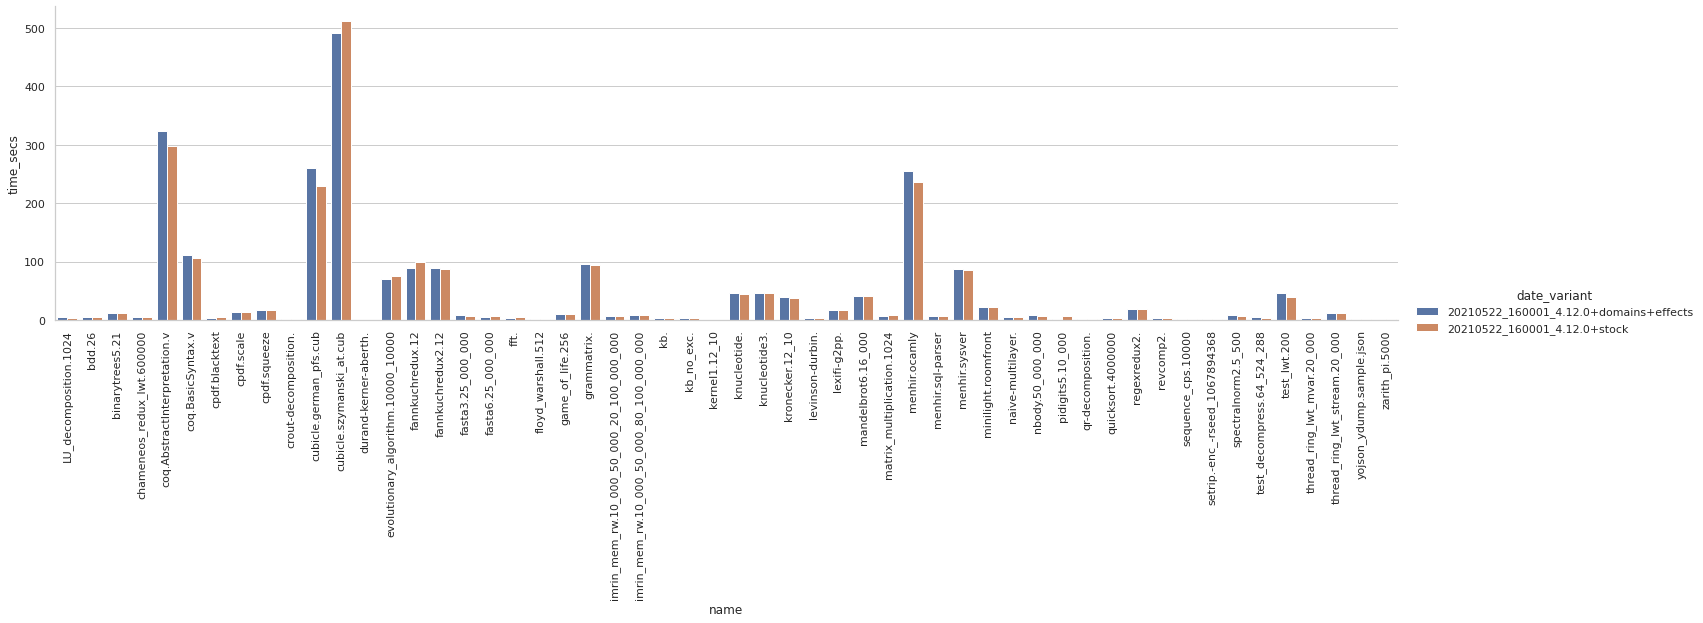

In [42]:
g = sns.catplot (x='name', y='time_secs', hue='date_variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalized

In [43]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
#     print(df['variant'])
    variant_metric_name = list([ zip(df[metric], df[x], df['name'])
            for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
    print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

{'LU_decomposition.1024': 4.008687973022461, 'bdd.26': 5.3053059577941895, 'binarytrees5.21': 12.657144784927368, 'chameneos_redux_lwt.600000': 4.272870779037476, 'coq.AbstractInterpretation.v': 298.5008850097656, 'coq.BasicSyntax.v': 106.19201397895813, 'cpdf.blacktext': 4.388762950897217, 'cpdf.scale': 14.05470609664917, 'cpdf.squeeze': 16.47126603126526, 'crout-decomposition.': 1.3311998844146729, 'cubicle.german_pfs.cub': 228.42732095718384, 'cubicle.szymanski_at.cub': 511.44421577453613, 'durand-kerner-aberth.': 0.140610933303833, 'evolutionary_algorithm.10000_10000': 75.57909393310547, 'fannkuchredux.12': 98.34426593780518, 'fannkuchredux2.12': 87.54505610466003, 'fasta3.25_000_000': 7.571018934249878, 'fasta6.25_000_000': 5.89620304107666, 'fft.': 4.276426076889038, 'floyd_warshall.512': 1.0702838897705078, 'game_of_life.256': 10.210636854171753, 'grammatrix.': 93.76698184013367, 'imrin_mem_rw.10_000_50_000_20_100_000_000': 6.444907188415527, 'imrin_mem_rw.10_000_50_000_80_100_0

<ipython-input-43-dc876b08008e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


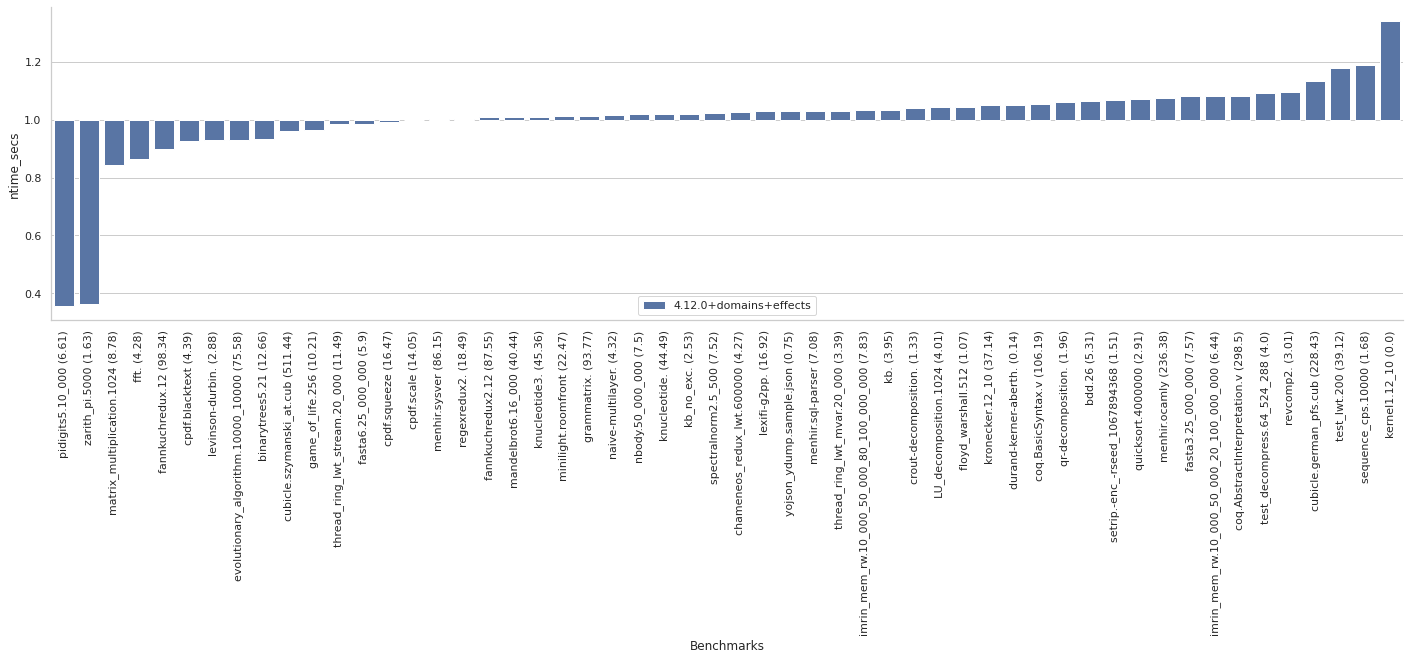

In [44]:
# print(df)
ndf = normalise(df,'4.12.0+stock','time_secs')
plot_normalised(ndf,'4.12.0+stock','ntime_secs')